## Packages

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Resources
General: 
- Hands on Machine Learning with scikit-learn and tensorflow, chapter 5, 6, 7

- Machine Learnia : https://www.youtube.com/watch?v=w_bLGK4Pteo


Decision Trees: 
- https://scikit-learn.org/stable/modules/tree.html
- https://www.lovelyanalytics.com/2016/08/16/decision-tree-comment-ca-marche/
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://www.youtube.com/watch?v=sgQAhG5Q7iY

Random Forests:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://www.youtube.com/watch?v=v6VJ2RO66Ag

SVM: 
- https://scikit-learn.org/stable/modules/svm.html
- https://towardsdatascience.com/a-brief-introduction-to-support-vector-machine-adf0f103a80f
- https://www.youtube.com/watch?v=_YPScrckx28
- https://www.youtube.com/watch?v=Q7vT0--5VII

Learning Curves: 
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
- https://towardsdatascience.com/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

Validation Curves 
- https://scikit-learn.org/stable/modules/learning_curve.html

- Take some time to read book sections for decision tree, random forest and SVM algorithms.
- Import these algorithms from scikit-learn and find the hyperparameter options that are available when they are instantiated.


## Decision trees

Explain here how they work in your own words:

In [43]:
# Load dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [44]:
# Train a decision tree with max_depth=2
from sklearn.model_selection import train_test_split
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

tree_clf = tree.DecisionTreeClassifier(max_depth=2)
tree_clf = tree_clf.fit(X, y)



### Visualization: export_graphviz

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

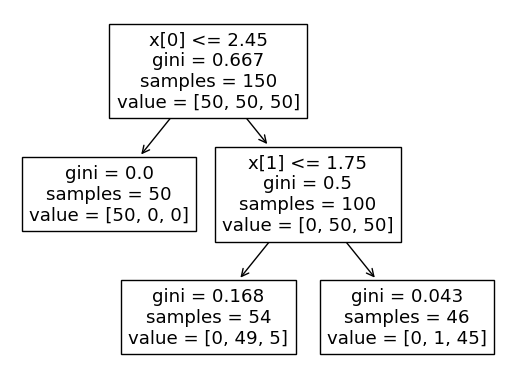

In [45]:
# Visualize decision tree using graphviz 
tree.plot_tree(tree_clf)

In [46]:
# open image with PIL

from PIL import Image
from os import system
from sklearn.tree import export_graphviz
export_graphviz(tree_clf,out_file="iris_tree.dot",feature_names=iris.feature_names[2:],class_names=iris.target_names,rounded=True,filled=True)

In [47]:
system("dot -Tpng iris_tree.dot -o iris_tree.png")


0

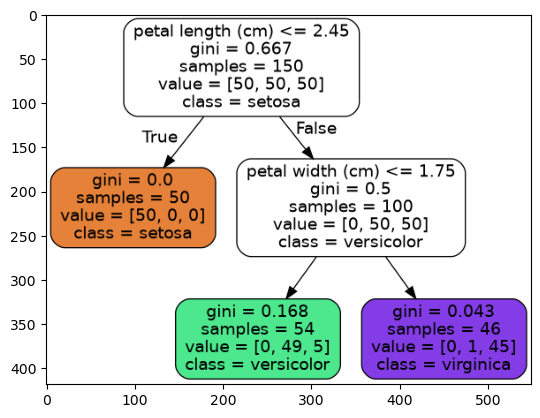

In [48]:
# open image with matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('iris_tree.png')
imgplot = plt.imshow(img)

### Visualization: plot_tree

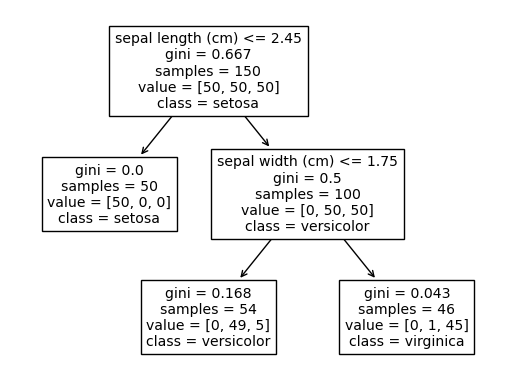

In [53]:
# visualize using the 'plot_tree' method (from the sklearn.tree module)
from sklearn.tree import plot_tree

plot = plot_tree(tree_clf, feature_names = iris.feature_names[:2], class_names = list(iris.target_names))

Compute the predictions of a decision tree classifier on a test set and calculate all the classification metrics you know:


In [54]:
# split in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# fit classifier with max_depth=2
tree_clf = tree.DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

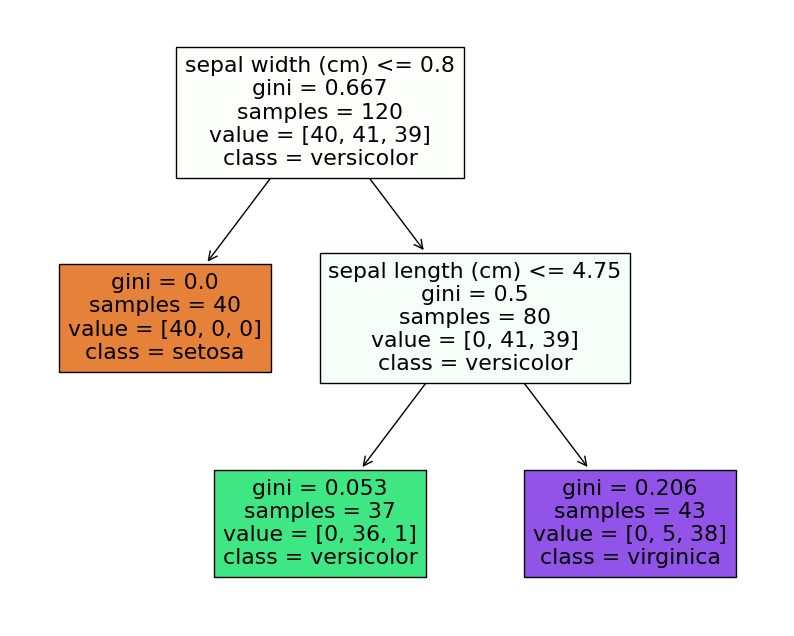

In [57]:
# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(tree_clf, feature_names=iris.feature_names[:2], class_names=list(iris.target_names), filled=True)
plt.show()

In [58]:
# make predictions on the test set
y_pred = tree_clf.predict(X_test)
# Print predictions
print("Predictions on the test set:", y_pred)

Predictions on the test set: [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [59]:
# (Optional) Print actual labels to compare
print("Actual labels:", y_test)

Actual labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [60]:
# Print Accuracy
# Print Confusion matrix
# Print Precision
# Print Recall
# Print F1-score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate and print the precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate and print the recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate and print the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1-score: 0.9664109121909632


## Random forests

Explain here how they work in your own words:

In [69]:
# fit a Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [70]:
# make predictions on the test set
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)
print("Actual labels:", y_pred)

Actual labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [71]:
# (Optional) Print actual labels to compare
print("Actual labels:", y_test)

Actual labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [72]:
# Print Accuracy
# Print Confusion matrix
# Print Precision
# Print Recall
# Print F1-score
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate and print the precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate and print the recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate and print the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0


## SVM

Explain here how they work in your own words:

In [75]:
# Book example SVM: iris dataset
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# fit a linear SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [77]:
# make predictions on the test set
y_pred = svm_clf.predict(X_test)

In [78]:
# Print Accuracy
# Print Confusion matrix
# Print Precision
# Print Recall
# Print F1-score
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate and print the precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate and print the recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate and print the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0


## Learning curves

### Book example

In [79]:
# Book Dataset
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [84]:
# Implement the book’s code on learning curves on the data he has used.
from sklearn.metrics import mean_squared_error
def plot_learning_curves(model, X, y):
   X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
   train_errors, val_errors = [], []
   for m in range(1, len(X_train)):
      model.fit(X_train[:m], y_train[:m])
      y_train_predict = model.predict(X_train[:m])
      y_val_predict = model.predict(X_val)
      train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
      val_errors.append(mean_squared_error(y_val, y_val_predict))
   plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
   plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
   plt.ylabel('errors')
   plt.xlabel('Training set sizes')

   plt.legend()


Change the method so that instead of having an incremental training set size going from 1 to the size of X_train, you have a fixed set of training sizes.
For example: 

training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')

or 

training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80]

In [ ]:
# Method that plots learning curves for a given estimator and training_set_sizes
def your_method_name_for_plotting_learning_curves():
   pass

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

## Learning curves for classifiers

Implement a ML problem on a dataset you have already seen in the course. 

Produce a plot of a model which shows signs of underfitting, and one that shows signs of overfitting.

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
# create your method to plot your learning curves using the sklearn method learning_curve()
    

## Decision trees learning curves

In [ ]:
# import the dataset you want

In [ ]:
# do all the pre-rpocessing that is needed

In [ ]:
# Underfit model
# Train a decision tree with max_depth=2

In [ ]:
# Overfit model
# Train a decision tree with max_depth=10

## Random forests classifier learning curves

In [ ]:
# Underfit model

In [ ]:
# Overfit model

## SVM

SVM Advantages:

- SVM’s are very good when we have no idea on the data.
- Works well with even unstructured and semi structured data like text, Images and trees.
- The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
- Unlike in neural networks, SVM is not solved for local optima.
- It scales relatively well to high dimensional data.
- SVM models have good generalization in practice, the risk of over-fitting is less in SVM.

SVM Disadvantages:

- Choosing a “good” kernel function is not easy.
- Long training time for large datasets.
- Difficult to understand and interpret the final model, variable weights and individual impact.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

In [ ]:
# Underfit model?


In [ ]:
# Overfit model?


## Validation curves

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters. They are complementaru of GridSearch and make for a very nice visual tool for ypur algorithm optimization. 


In [ ]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, param_range=None, paran_name=None):

    # create your method to plot your learning curves using the sklearn method validation_curve()
    pass

Plot the validation curves for a chosen algorithm and vary 1 or 2 parameters of your choice.

Do a GridSearch and see if the most optimal parameter is coherent with what you see on your validation curves